In [276]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import HTML, YouTubeVideo
import matplotlib.patches as patches
from matplotlib.lines import Line2D
# import ganymede
# ganymede.configure('uav.beaver.works')

### Enter your name below and run the cell:

Individual cells can be run with `Ctrl` + `Enter`

In [ ]:
ganymede.name('YOUR NAME HERE')
def check(p):
    ganymede.update(p,True)
check(0)

https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/squared-error-of-regression-line

*Note: All Khan Academy content is available for free at khanacademy.org*

In [ ]:
YouTubeVideo('6OvhLPS7rj4', width=560, height=315)

In [ ]:
YouTubeVideo('mIx2Oj5y9Q8', width=560, height=315)

In [ ]:
YouTubeVideo('f6OnoxctvUk', width=560, height=315)

In [ ]:
YouTubeVideo('u1HhUB3NP8g', width=560, height=315)

In [ ]:
YouTubeVideo('8RSTQl0bQuw', width=560, height=315)

In [ ]:
YouTubeVideo('GAmzwIkGFgE', width=560, height=315)

**The last video is optional**

In [ ]:
YouTubeVideo('ww_yT9ckPWw', width=560, height=315)

(215, 209)


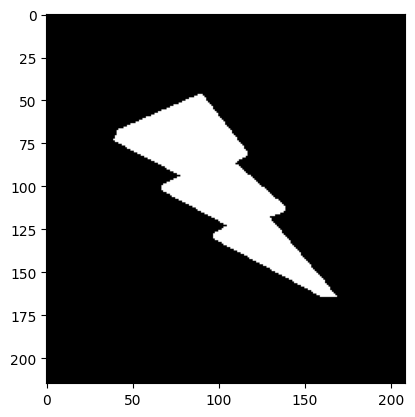

In [364]:
lightningbolt = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
_, lightningbolt = cv2.threshold(lightningbolt,150,255,cv2.THRESH_BINARY)
print(lightningbolt.shape)
fig,ax = plt.subplots()
ax.imshow(lightningbolt, cmap='gray');
# check(1)

In [278]:
np.argwhere?

Signature:       np.argwhere(a)
Call signature:  np.argwhere(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function argwhere at 0x7ff51010c400>
File:            ~/miniconda3/lib/python3.13/site-packages/numpy/_core/numeric.py
Docstring:      
Find the indices of array elements that are non-zero, grouped by element.

Parameters
----------
a : array_like
    Input data.

Returns
-------
index_array : (N, a.ndim) ndarray
    Indices of elements that are non-zero. Indices are grouped by element.
    This array will have shape ``(N, a.ndim)`` where ``N`` is the number of
    non-zero items.

See Also
--------
where, nonzero

Notes
-----
``np.argwhere(a)`` is almost the same as ``np.transpose(np.nonzero(a))``,
but produces a result of the correct shape for a 0D array.

The output of ``argwhere`` is not suitable for indexing arrays.
For this purpose use ``nonzero(a)`` instead.

Examples
--------
>>> import numpy as np
>>> x = np.arange(6).reshape(2,3)
>>> x
arra

In [363]:
bolt = np.argwhere(lightningbolt)
bolt

array([[ 47,  88],
       [ 47,  89],
       [ 47,  90],
       ...,
       [164, 166],
       [164, 167],
       [164, 168]], shape=(4884, 2))

## Linear Regression

$$m = \frac{\bar{x}\bar{y} - \overline{xy}}{(\bar{x})^2 - \overline{x^2}}$$

$$b = \bar{y} - m\bar{x}$$

## Question: how can we extract the xs and ys separately from the result of argwhere?

Hint: review numpy slicing by columns and rows

In [280]:
# Bolt is of shape (4880, 2) where 4880 refers to the number of pixels in bolt and 2 refers to the xy coordinate of each pixel.
# We want to extract all xs and ys separately, so we take all rows by using the ':' operator, and we specifically take the 0th row for x, and the 1st row for y.
x, y = bolt[:, 1], bolt[:, 0] # or: x, y, = np.argwhere(lightningbolt)[:, 1], np.argwhere(lightningbolt)[:, 0]

## Question: Why would we want to convert x and y points from int values to floats?

In [420]:
# Linear regression requires continuous values. If x and y are ints, then we will lose a lot of precision in our calculations.
# If x and y are floats, however, then we maintain a good amount of precision.

In [421]:
def calculate_regression(points): # input is the result of np.argwhere
    # convert points to float
    points = points.astype(float) # (see astype, https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html)
    # N x 2
    xs = points[:, 1]
    ys = points[:, 0]
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)

    xy_mean = np.mean(xs * ys)

    x_squared_mean =  np.mean(np.square(xs))

    m = ((x_mean * y_mean) - xy_mean) / (np.square(x_mean) - x_squared_mean)
    b = y_mean - m * x_mean

    return (m,b)

The intercept we calculated, $b$, may be outside of the pixel space of the image, so we must find two points inside of pixel space, $(x_1, y_1)$ and $(x2, y2)$ which will allow us to plot our regression line on the image. It may be best to choose points on the regression line which also occur on the boundaries/extrema of the image.

In [ ]:
# # given m and b, find (x1, y1) and (x2, y2) that exist on the bound of the image.
# def find_inliers(m, b, shape):
#     if b > shape[1]:
#         x1 = shape[1] 
#     elif b < 0:
#         pass
#     x1, y1, x2, y2 = 0, np.clip(b, 0, shape[1]).item(), shape[0], np.clip(b, 0, shape[1]).item() # ? what are u even bounding here
#     return x1, y1, x2, y2 #?

## TODO

1. Run your linear regression algorithm on the following images. 
2. Plot each of the results. 
3. Include each result in your submitted PDF.

In [422]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

0.8683160037978318 12.335814379930937


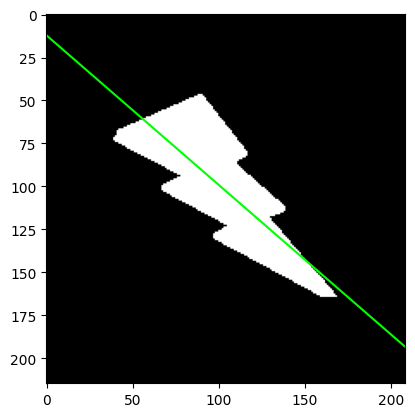

In [429]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
_, lightningbolt = cv2.threshold(lightningbolt,125,255,cv2.THRESH_BINARY)
m,b = calculate_regression(np.argwhere(lightningbolt))
print(m, b)
fig,ax = plt.subplots()
ax.imshow(lightningbolt, cmap='gray');
regression = Line2D([0,lightningbolt.shape[0]],[b,(m*lightningbolt.shape[0]+b)], color='lime')
ax.add_line(regression);

# cv2
# fig,ax = plt.subplots()
# ax.imshow(lightningbolt, cmap='gray');
# rows,cols = np.argwhere(lightningbolt).shape[:2]
# [vx,vy,x,y] = cv2.fitLine(np.flip(np.argwhere(lightningbolt), axis=1), cv2.DIST_L2,0,0.01,0.01)
# m = vy / vx
# b = y - m * x
# print(m, b) # [0.9105642] [9.764412]
# regression = Line2D([0,lightningbolt.shape[0]],[b,(m*lightningbolt.shape[0]+b)], color='lime')
# ax.add_line(regression);

-1.4436813987439807 158.4872955911494


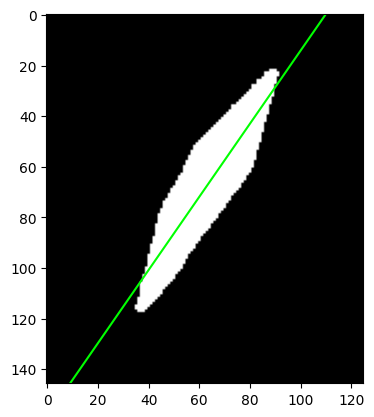

In [431]:
_, blob = cv2.threshold(blob,125,255,cv2.THRESH_BINARY)
m,b = calculate_regression(np.argwhere(blob))
print(m, b)
fig,ax = plt.subplots()
ax.imshow(blob, cmap='gray');
regression = Line2D([0,star.shape[0]],[b,(m*star.shape[0]+b)], color='lime')
ax.add_line(regression);

# cv2
# fig,ax = plt.subplots()
# ax.imshow(blob, cmap='gray');
# rows,cols = np.argwhere(blob).shape[:2]
# [vx,vy,x,y] = cv2.fitLine(np.flip(np.argwhere(blob), axis=1), cv2.DIST_L2,0,0.01,0.01)
# m = vy / vx
# b = y - m * x
# print(m, b) # [0.9105642] [9.764412]
# regression = Line2D([0,blob.shape[0]],[b,(m*blob.shape[0]+b)], color='lime')
# ax.add_line(regression);

-0.0004988775687822369 69.7878135478411


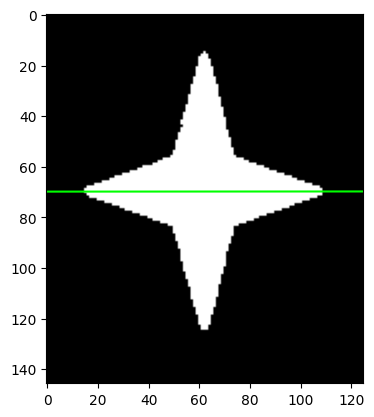

In [432]:
_, star = cv2.threshold(star,125,255,cv2.THRESH_BINARY)
m,b = calculate_regression(np.argwhere(star))
print(m, b)
fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');
regression = Line2D([0,star.shape[0]],[b,(m*star.shape[0]+b)], color='lime')
ax.add_line(regression);

# cv2
# fig,ax = plt.subplots()
# ax.imshow(star, cmap='gray');
# rows,cols = np.argwhere(star).shape[:2]
# [vx,vy,x,y] = cv2.fitLine(np.flip(np.argwhere(star), axis=1), cv2.DIST_L2,0,0.01,0.01)
# m = vy / vx
# b = y - m * x
# print(m, b) # [-885.0015] [54611.797]
# regression = Line2D([0,star.shape[0]],[b,(m*star.shape[0]+b)], color='lime')
# ax.add_line(regression);

-0.033897508301873575 71.71704249655464


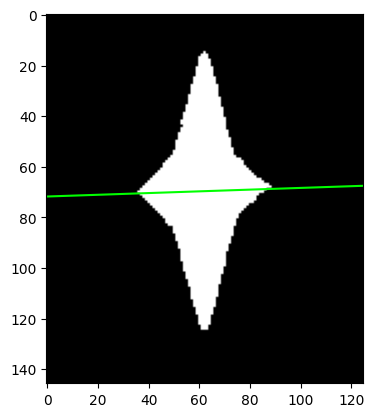

In [433]:
_, squishedstar = cv2.threshold(squishedstar,125,255,cv2.THRESH_BINARY)
m,b = calculate_regression(np.argwhere(squishedstar))
print(m, b) # -0.033897508301873575 71.71704249655464
fig,ax = plt.subplots()
ax.imshow(squishedstar, cmap='gray');
regression = Line2D([0,squishedstar.shape[0]],[b,(m*squishedstar.shape[0]+b)], color='lime')
ax.add_line(regression);

# cv2
# fig,ax = plt.subplots()
# ax.imshow(squishedstar, cmap='gray');
# rows,cols = np.argwhere(squishedstar).shape[:2]
# [vx,vy,x,y] = cv2.fitLine(np.flip(np.argwhere(squishedstar), axis=1), cv2.DIST_L2,0,0.01,0.01)
# m = vy / vx
# b = y - m * x
# print(m, b) # [-164.11803] [10162.628]
# regression = Line2D([0,squishedstar.shape[0]],[b,(m*squishedstar.shape[0]+b)], color='lime')
# ax.add_line(regression);

-1.0085541082811376 132.177777134707


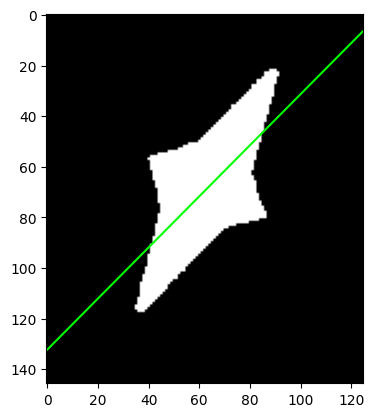

In [434]:
_, squishedturnedstar = cv2.threshold(squishedturnedstar,125,255,cv2.THRESH_BINARY)
m,b = calculate_regression(np.argwhere(squishedturnedstar))
print(m, b) # -1.0085541082811376 132.177777134707
fig,ax = plt.subplots()
ax.imshow(squishedturnedstar, cmap='gray');
regression = Line2D([0,squishedturnedstar.shape[0]],[b,(m*squishedturnedstar.shape[0]+b)], color='lime')
ax.add_line(regression);

# cv2
# fig,ax = plt.subplots()
# ax.imshow(squishedturnedstar, cmap='gray');
# rows,cols = np.argwhere(squishedturnedstar).shape[:2]
# [vx,vy,x,y] = cv2.fitLine(np.flip(np.argwhere(squishedturnedstar), axis=1), cv2.DIST_L2,0,0.01,0.01)
# m = vy / vx
# b = y - m * x
# print(m, b) # [-1.7477704] [178.48894]
# regression = Line2D([0,squishedturnedstar.shape[0]],[b,(m*squishedturnedstar.shape[0]+b)], color='lime')
# ax.add_line(regression);

-0.8440715913502957 128.21845280045324


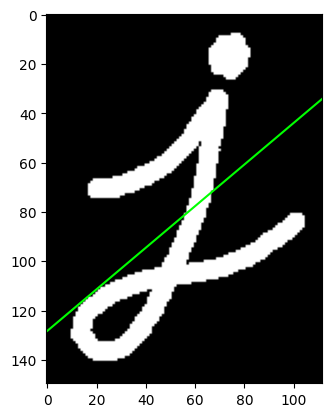

In [435]:
_, letterj = cv2.threshold(letterj,125,255,cv2.THRESH_BINARY)
m,b = calculate_regression(np.argwhere(letterj))
print(m, b) # -0.8440715913502957 128.21845280045324
fig,ax = plt.subplots()
ax.imshow(letterj, cmap='gray');
regression = Line2D([0,letterj.shape[0]],[b,(m*letterj.shape[0]+b)], color='lime')
ax.add_line(regression);

# cv2
# fig,ax = plt.subplots()
# ax.imshow(letterj, cmap='gray');
# rows,cols = np.argwhere(letterj).shape[:2]
# [vx,vy,x,y] = cv2.fitLine(np.flip(np.argwhere(letterj), axis=1), cv2.DIST_L2,0,0.01,0.01)
# m = vy / vx
# b = y - m * x
# print(m, b) # [-2.2818005] [204.82495]
# regression = Line2D([0,letterj.shape[0]],[b,(m*letterj.shape[0]+b)], color='lime')
# ax.add_line(regression);

## When you are done:

You should have six images with regression lines plotted on top of them.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 

## Stretch goal

*Implement a machine learning algorithm!*

**Ran**dom **Sa**mple **C**onsensus, commonly referred to as *RANSAC*, is one of the most widely used machine learning algorithms. In essence, it is a 'guess and check' algorithm. Take a small random sample of your data - two points in this case. Next, define a line through those two points. After doing so, count the number of *inliers*, or points closest to that line (euclidean distance is one way to do this).

https://en.wikipedia.org/wiki/Random_sample_consensus

Implement RANSAC for linear regression, and run it on all of your images.